In [11]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2

In [3]:
src = './example/'

In [7]:
img = imageio.imread(src+'0024.png')

/var/folders/n_/y9dctr894_97z2n67d4gvf280000gn/T/ipykernel_11168/3926219646.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(src+'0024.png')


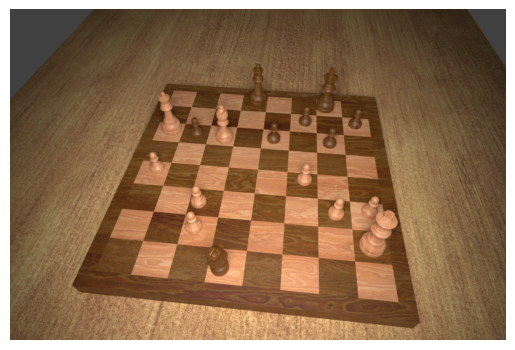

In [16]:
plt.axis('off')
plt.imshow(img)

In [12]:
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

In [19]:
param = {'criteria' : (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0), 'K': 6, 'attempts': 10}

In [20]:
ret,label,center=cv2.kmeans(twoDimage,param['K'],None,param['criteria'],param['attempts'],cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

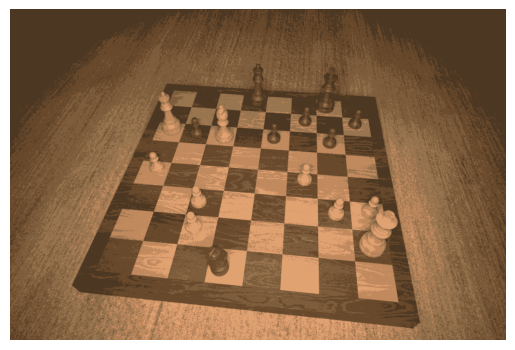

In [21]:
plt.axis('off')
plt.imshow(result_image)

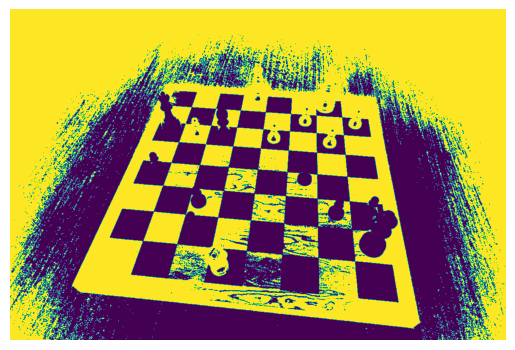

In [18]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# remove noise
img_ = cv2.GaussianBlur(gray,(3,3),0)

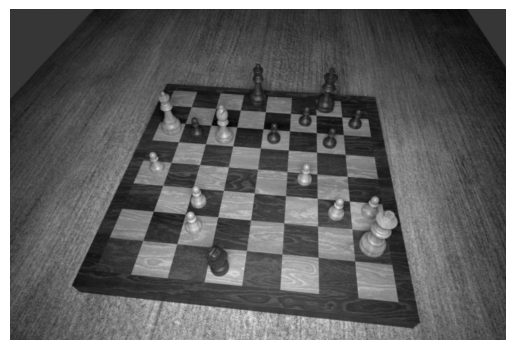

In [57]:
plt.axis('off')
plt.imshow(img_, cmap='gray')

In [27]:
laplacian = cv2.Laplacian(img_,cv2.CV_64F)
sobelx = cv2.Sobel(img_,cv2.CV_64F,1,0,ksize=7)  # x
sobely = cv2.Sobel(img_,cv2.CV_64F,0,1,ksize=7)  # y

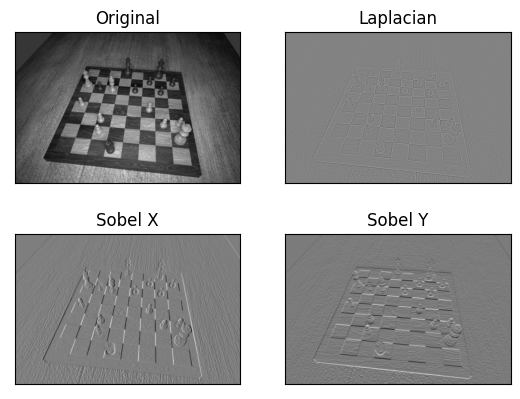

In [28]:
plt.subplot(2,2,1),plt.imshow(img_,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

/var/folders/n_/y9dctr894_97z2n67d4gvf280000gn/T/ipykernel_11168/3500408378.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121),plt.imshow(img_,cmap = 'gray')


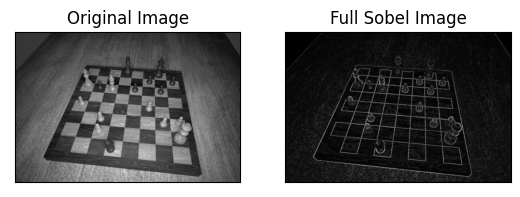

In [58]:
sobel = abs(sobelx) + abs(sobely)
plt.axis('off')
plt.subplot(121),plt.imshow(img_,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobel,cmap = 'gray')
plt.title('Full Sobel Image'), plt.xticks([]), plt.yticks([])
plt.show()

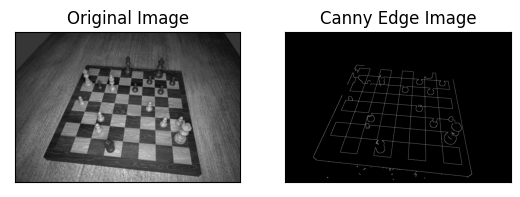

In [55]:
edgesCanny = cv2.Canny(img_, 100,220)
plt.subplot(121),plt.imshow(img_,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edgesCanny,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

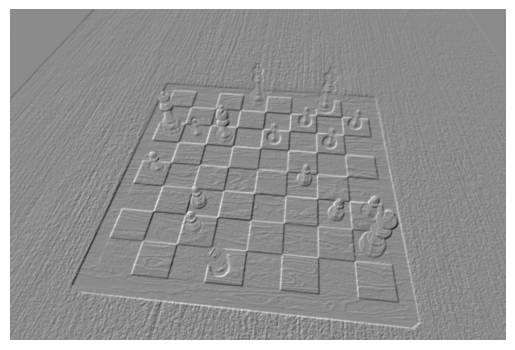

In [56]:
test = sobel - edgesCanny
plt.axis('off')
plt.imshow(test, cmap='gray')

In [48]:
lines_list =[]
lines = cv2.HoughLinesP(
            edgesCanny, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=80, # Min number of votes for valid line
            minLineLength=4, # Min allowed length of line
            maxLineGap=15 # Max allowed gap between line for joining them
            )
 
# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])

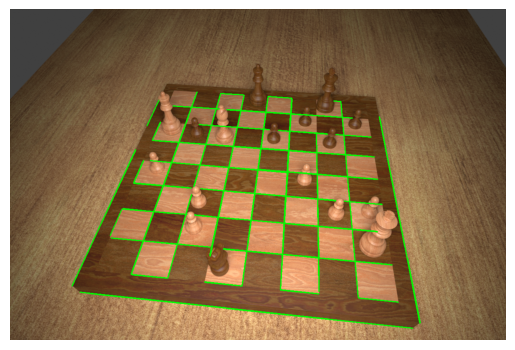

In [51]:
plt.axis('off')
plt.imshow(img)